# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [64]:
pip install citipy==0.0.5

Note: you may need to restart the kernel to use updated packages.


In [110]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

from scipy.stats import linregress

# Import API key
from my_api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [111]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces for correct URL print
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [112]:
#Test API response for London and review JSON structure
url = "http://api.openweathermap.org/data/2.5/weather?"
citytest = "London"
query_url = url + "appid=" + weather_api_key + "&q=" + citytest

print(weather_api_key)
print(query_url)

weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json

a093ec19a692d1ce416a8a158ae16077
http://api.openweathermap.org/data/2.5/weather?appid=a093ec19a692d1ce416a8a158ae16077&q=London


{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 290.28,
  'feels_like': 290.11,
  'temp_min': 287.72,
  'temp_max': 292.44,
  'pressure': 1013,
  'humidity': 79},
 'visibility': 10000,
 'wind': {'speed': 1.34, 'deg': 72, 'gust': 3.13},
 'clouds': {'all': 75},
 'dt': 1627845296,
 'sys': {'type': 2,
  'id': 268730,
  'country': 'GB',
  'sunrise': 1627791859,
  'sunset': 1627847352},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [113]:
#build partial query url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=a093ec19a692d1ce416a8a158ae16077&units=Imperial&q=


In [119]:
# Empty lists for resposes
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#start call counter
record_count = 1
record_name = ""

print("START DATA RETRIEVAL")
print("-------------------------")

# Make a request for each city
for city in cities:
        
    # Try statement to append callsfor present values
    # Some calls may not return data due to mismatch between OpenWeatherMap and CityPy datasets
    try: 
        weather_response = requests.get(query_url + city).json()
        city_name.append(weather_response["name"])
        lat.append(weather_response["coord"]["lat"])
        lng.append(weather_response["coord"]["lon"])
        max_temp.append(weather_response["main"]["temp_max"])
        humidity.append(weather_response["main"]["humidity"])
        wind_speed.append(weather_response["wind"]["speed"])
        cloudiness.append(weather_response["clouds"]["all"])
        country.append(weather_response["sys"]["country"])
        date.append(weather_response["dt"])
        
    
        record_name = weather_response["name"]
                         
        print(f"Processing Record #{record_count} | {record_name}")
        print(f"{url}{city}")
                         
        record_count = record_count + 1
        
        # Wait to not exceed rate limit of OpenWeatherMap API
        time.sleep(60)
        
    except:
        
        print("City not found. Skipping...")
        
    continue

print("-------------------------")
print("DATA RETRIEVAL COMPLETE")

Beginning Data Retrieval
-------------------------
Processing Record 1 | Hay River
http://api.openweathermap.org/data/2.5/weather?hay%20river
Processing Record 2 | Prince Rupert
http://api.openweathermap.org/data/2.5/weather?prince%20rupert
Processing Record 3 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?ushuaia
Processing Record 4 | Busselton
http://api.openweathermap.org/data/2.5/weather?busselton
City not found. Skipping...
Processing Record 5 | Mataura
http://api.openweathermap.org/data/2.5/weather?mataura
Processing Record 6 | Rohnert Park
http://api.openweathermap.org/data/2.5/weather?rohnert%20park
Processing Record 7 | Sørland
http://api.openweathermap.org/data/2.5/weather?sorland
Processing Record 8 | Nikolskoye
http://api.openweathermap.org/data/2.5/weather?nikolskoye
Processing Record 9 | Cape Town
http://api.openweathermap.org/data/2.5/weather?cape%20town
Processing Record 10 | Jamestown
http://api.openweathermap.org/data/2.5/weather?jamestown
Processing Record 

Processing Record 89 | Tambun
http://api.openweathermap.org/data/2.5/weather?tambun
Processing Record 90 | Maceió
http://api.openweathermap.org/data/2.5/weather?maceio
Processing Record 91 | Matara
http://api.openweathermap.org/data/2.5/weather?matara
Processing Record 92 | Vilyuysk
http://api.openweathermap.org/data/2.5/weather?vilyuysk
Processing Record 93 | Yellowknife
http://api.openweathermap.org/data/2.5/weather?yellowknife
Processing Record 94 | Sandy Bay
http://api.openweathermap.org/data/2.5/weather?sandy%20bay
Processing Record 95 | Mormugao
http://api.openweathermap.org/data/2.5/weather?mormugao
Processing Record 96 | San Angelo
http://api.openweathermap.org/data/2.5/weather?san%20angelo
City not found. Skipping...
Processing Record 97 | Longyearbyen
http://api.openweathermap.org/data/2.5/weather?longyearbyen
City not found. Skipping...
Processing Record 98 | Talnakh
http://api.openweathermap.org/data/2.5/weather?talnakh
Processing Record 99 | Lorengau
http://api.openweather

Processing Record 179 | Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?saint-philippe
Processing Record 180 | Havøysund
http://api.openweathermap.org/data/2.5/weather?havoysund
Processing Record 181 | Isangel
http://api.openweathermap.org/data/2.5/weather?isangel
Processing Record 182 | Jijiang
http://api.openweathermap.org/data/2.5/weather?jijiang
Processing Record 183 | Pangnirtung
http://api.openweathermap.org/data/2.5/weather?pangnirtung
Processing Record 184 | Bilma
http://api.openweathermap.org/data/2.5/weather?bilma
Processing Record 185 | Acapulco de Juárez
http://api.openweathermap.org/data/2.5/weather?acapulco
Processing Record 186 | City of San Pedro
http://api.openweathermap.org/data/2.5/weather?san%20pedro
City not found. Skipping...
Processing Record 187 | Thompson
http://api.openweathermap.org/data/2.5/weather?thompson
Processing Record 188 | Ust'-Karsk
http://api.openweathermap.org/data/2.5/weather?ust-karsk
Processing Record 189 | Ipaba
http://api.openwe

Processing Record 266 | Alihe
http://api.openweathermap.org/data/2.5/weather?alihe
Processing Record 267 | Ayan
http://api.openweathermap.org/data/2.5/weather?ayan
Processing Record 268 | Arrondissement de Perpignan
http://api.openweathermap.org/data/2.5/weather?perpignan
Processing Record 269 | Bambanglipuro
http://api.openweathermap.org/data/2.5/weather?bambanglipuro
City not found. Skipping...
Processing Record 270 | Santa Isabel Rio Negro
http://api.openweathermap.org/data/2.5/weather?santa%20isabel%20do%20rio%20negro
Processing Record 271 | Shenzhen
http://api.openweathermap.org/data/2.5/weather?shenzhen
Processing Record 272 | Kilindoni
http://api.openweathermap.org/data/2.5/weather?kilindoni
Processing Record 273 | Hamilton
http://api.openweathermap.org/data/2.5/weather?hamilton
Processing Record 274 | Bulihan
http://api.openweathermap.org/data/2.5/weather?bulihan
Processing Record 275 | Tilichiki
http://api.openweathermap.org/data/2.5/weather?tilichiki
Processing Record 276 | A

Processing Record 355 | Iguape
http://api.openweathermap.org/data/2.5/weather?iguape
Processing Record 356 | Ahipara
http://api.openweathermap.org/data/2.5/weather?ahipara
Processing Record 357 | San Fernando del Valle de Catamarca
http://api.openweathermap.org/data/2.5/weather?catamarca
City not found. Skipping...
Processing Record 358 | Sakassou
http://api.openweathermap.org/data/2.5/weather?sakassou
Processing Record 359 | Dābhol
http://api.openweathermap.org/data/2.5/weather?dabhol
Processing Record 360 | Stokmarknes
http://api.openweathermap.org/data/2.5/weather?stokmarknes
Processing Record 361 | Stromness
http://api.openweathermap.org/data/2.5/weather?stromness
Processing Record 362 | Tiarei
http://api.openweathermap.org/data/2.5/weather?tiarei
Processing Record 363 | Kaura Namoda
http://api.openweathermap.org/data/2.5/weather?kaura%20namoda
Processing Record 364 | Dhidhdhoo
http://api.openweathermap.org/data/2.5/weather?dhidhdhoo
Processing Record 365 | Guerrero Negro
http://ap

City not found. Skipping...
Processing Record 445 | Farah
http://api.openweathermap.org/data/2.5/weather?farah
Processing Record 446 | Ile-Ife
http://api.openweathermap.org/data/2.5/weather?ife
Processing Record 447 | Souillac
http://api.openweathermap.org/data/2.5/weather?souillac
Processing Record 448 | Amga
http://api.openweathermap.org/data/2.5/weather?amga
Processing Record 449 | Saint-Pierre
http://api.openweathermap.org/data/2.5/weather?saint-pierre
Processing Record 450 | Vikeså
http://api.openweathermap.org/data/2.5/weather?vikesa
Processing Record 451 | St. Marys
http://api.openweathermap.org/data/2.5/weather?saint%20marys
Processing Record 452 | Aksha
http://api.openweathermap.org/data/2.5/weather?aksha
Processing Record 453 | Camacha
http://api.openweathermap.org/data/2.5/weather?camacha
Processing Record 454 | Kaeo
http://api.openweathermap.org/data/2.5/weather?kaeo
Processing Record 455 | Port Hedland
http://api.openweathermap.org/data/2.5/weather?port%20hedland
City not 

Processing Record 534 | Skibotn
http://api.openweathermap.org/data/2.5/weather?skibotn
Processing Record 535 | College
http://api.openweathermap.org/data/2.5/weather?college
Processing Record 536 | Alad
http://api.openweathermap.org/data/2.5/weather?alad
Processing Record 537 | Benalla
http://api.openweathermap.org/data/2.5/weather?benalla
Processing Record 538 | São Miguel
http://api.openweathermap.org/data/2.5/weather?sao%20miguel
Processing Record 539 | Kalmar
http://api.openweathermap.org/data/2.5/weather?kalmar
Processing Record 540 | Sitka
http://api.openweathermap.org/data/2.5/weather?sitka
Processing Record 541 | Znamenskoye
http://api.openweathermap.org/data/2.5/weather?znamenskoye
Processing Record 542 | Port Pirie
http://api.openweathermap.org/data/2.5/weather?port%20pirie
Processing Record 543 | Boa Vista
http://api.openweathermap.org/data/2.5/weather?boa%20vista
Processing Record 544 | Lima
http://api.openweathermap.org/data/2.5/weather?lima
Processing Record 545 | Izhma
h

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [121]:
 # Import lists to dataframe
weather_data = {"City": city_name,
                "Lat": lat,
                "lng": lng,
                "Max Temp": max_temp,
                "Humidity": humidity,
                "Cloudiness": cloudiness,
                "Wind Speed": wind_speed,
                "Country": country,
                "Date": date,
               }

weather_df = pd.DataFrame(weather_data)

weather_df.head()

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hay River,60.8156,-115.7999,85.98,39,75,2.30,CA,1627845899
1,Prince Rupert,54.3161,-130.3201,60.49,94,90,3.44,CA,1627845900
2,Ushuaia,-54.8000,-68.3000,46.06,57,0,6.91,AR,1627845900
3,Busselton,-33.6500,115.3333,52.56,76,100,8.21,AU,1627845900
4,Mataura,-46.1927,168.8643,40.48,98,64,3.74,NZ,1627845900


In [123]:
# Write dataframe to CSV
weather_df.to_csv("weather_data.csv")

In [134]:
# Check output of CSV file (not sure why there are four less values for Country - will investigate if I have time)
pd.read_csv("weather_data.csv").count()

Unnamed: 0    548
City          548
Lat           548
lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       544
Date          548
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [132]:
weather_df.describe()

# max huidity shows no cities over 100 for humidity - nice :) 
# skipping to next step ----->

,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,18.496875,18.385798,70.370675,70.408759,52.224453,8.215839,1.627846e+09
std,32.947660,91.058246,14.522732,21.014683,38.888849,5.473155,3.471113e+02
min,-54.800000,-175.200000,33.120000,9.000000,0.000000,0.000000,1.627846e+09
25%,-7.922925,-63.134950,59.215000,58.000000,11.750000,4.000000,1.627846e+09
50%,19.639250,20.354800,71.760000,75.500000,54.500000,6.910000,1.627846e+09
75%,46.518350,100.466975,81.197500,86.250000,91.250000,11.500000,1.627847e+09
max,78.218600,178.416700,107.850000,100.000000,100.000000,27.630000,1.627847e+09


In [133]:
# check for missing values 
#(there are no missing values for country in dataframe, so I will not waste time investigating at this point)
weather_df.count()

City          548
Lat           548
lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [130]:
# check data types
weather_df.dtypes

City           object
Lat           float64
lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

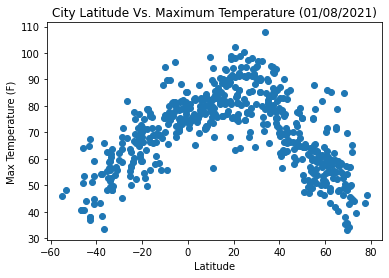

In [179]:
temp = weather_df["Max Temp"]
latitude = weather_df["Lat"]

plt.scatter(latitude,temp)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude Vs. Maximum Temperature (01/08/2021)")
plt.savefig("Latitude_Vs_Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

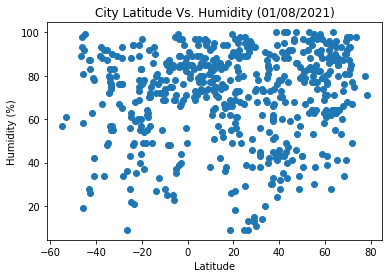

In [180]:
humidity = weather_df["Humidity"]
latitude = weather_df["Lat"]

plt.scatter(latitude,humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude Vs. Humidity (01/08/2021)")
plt.savefig("Latitude_Vs_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

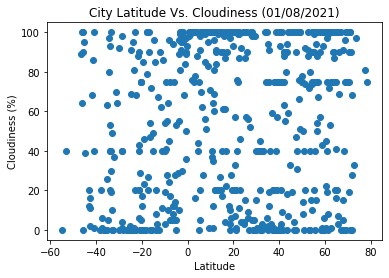

In [181]:
cloudiness = weather_df["Cloudiness"]
latitude = weather_df["Lat"]

plt.scatter(latitude,cloudiness)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude Vs. Cloudiness (01/08/2021)")
plt.savefig("Latitude_Vs_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

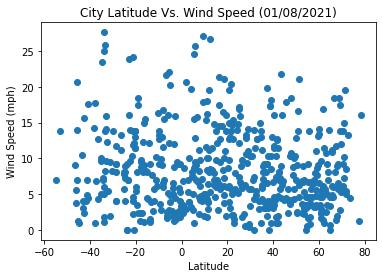

In [182]:
wind = weather_df["Wind Speed"]
latitude = weather_df["Lat"]

plt.scatter(latitude,wind)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude Vs. Wind Speed (01/08/2021)")
plt.savefig("Latitude_Vs_WindSpeed.png")
plt.show()

## Linear Regression

In [153]:
# loc dataframe to northern and southern hemisphere datasets
north = weather_df.loc[weather_df["Lat"] > 0]
south = weather_df.loc[weather_df["Lat"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [188]:
#check minimum latitude
north.describe()

,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,3.730000e+02
mean,36.984369,14.133459,72.648070,71.461126,56.434316,8.030402,1.627846e+09
std,20.914290,89.207846,14.770622,21.121301,39.135883,5.280951,3.458333e+02
min,0.516700,-173.300000,33.120000,9.000000,0.000000,0.000000,1.627846e+09
25%,18.733300,-68.591400,61.250000,61.000000,16.000000,4.000000,1.627846e+09
50%,37.463600,15.947700,75.540000,77.000000,70.000000,6.760000,1.627846e+09
75%,55.433300,91.554200,83.590000,88.000000,98.000000,11.120000,1.627847e+09
max,78.218600,178.416700,107.850000,100.000000,100.000000,27.110000,1.627847e+09


In [189]:
#row count
north

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hay River,60.8156,-115.7999,85.98,39,75,2.30,CA,1627845899
1,Prince Rupert,54.3161,-130.3201,60.49,94,90,3.44,CA,1627845900
5,Rohnert Park,38.3396,-122.7011,86.02,52,0,4.00,US,1627845900
6,Sørland,67.6670,12.6934,46.47,73,91,11.70,NO,1627845901
7,Nikolskoye,59.7035,30.7861,64.40,69,6,9.13,RU,1627845901
...,...,...,...,...,...,...,...,...,...
540,Znamenskoye,57.1281,73.8282,61.54,98,67,6.35,RU,1627846762
542,Boa Vista,2.8197,-60.6733,76.98,83,75,6.91,BR,1627846765
544,Izhma,65.0083,53.9113,52.23,96,41,3.33,RU,1627846767
545,Tyazhinskiy,56.1160,88.5240,56.19,85,15,3.51,RU,1627846768


In [190]:
#check max latitude does not exceed 0
south.describe()

,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,1.750000e+02
mean,-20.907897,27.449355,65.516571,68.165714,43.251429,8.611086,1.627846e+09
std,13.532378,94.504030,12.719325,20.666786,36.889781,5.857968,3.474351e+02
min,-54.800000,-175.200000,33.550000,9.000000,0.000000,0.000000,1.627846e+09
25%,-32.755850,-52.780100,56.145000,55.000000,5.000000,4.000000,1.627846e+09
50%,-20.316700,25.950000,67.460000,73.000000,40.000000,8.050000,1.627846e+09
75%,-9.000500,120.233350,75.225000,84.500000,81.000000,12.215000,1.627847e+09
max,-0.413900,173.783300,96.600000,99.000000,100.000000,27.630000,1.627847e+09


In [155]:
# row count
south

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Ushuaia,-54.8000,-68.3000,46.06,57,0,6.91,AR,1627845900
3,Busselton,-33.6500,115.3333,52.56,76,100,8.21,AU,1627845900
4,Mataura,-46.1927,168.8643,40.48,98,64,3.74,NZ,1627845900
8,Cape Town,-33.9258,18.4232,59.11,79,40,1.14,ZA,1627845779
10,Richards Bay,-28.7830,32.0377,63.81,76,4,4.00,ZA,1627845901
...,...,...,...,...,...,...,...,...,...
536,Benalla,-36.5500,145.9833,33.55,92,0,4.27,AU,1627846758
537,São Miguel,-5.4667,-35.3667,80.92,69,5,22.08,BR,1627846759
541,Port Pirie,-33.1833,138.0167,48.29,55,0,14.07,AU,1627846764
543,Lima,-12.0432,-77.0282,68.90,72,90,5.75,PE,1627846766


In [156]:
# check row count of north & south equal the original dataset
total = 373 + 175
total

548

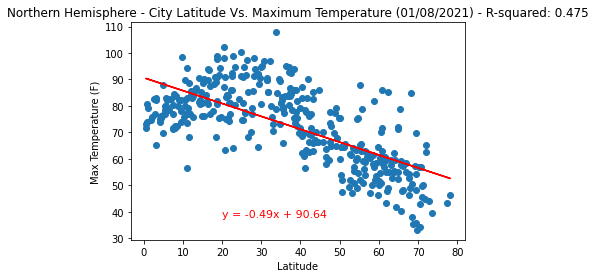

In [183]:
import scipy.stats as st

temp = north["Max Temp"]
latitude = north["Lat"]

x_values = latitude
y_values = temp

slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(latitude,temp)
plt.annotate(line_eq,(20,38),fontsize=11,color="red")
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"Northern Hemisphere - City Latitude Vs. Maximum Temperature (01/08/2021) - R-squared: {round(rvalue**2, 3)}")
plt.savefig("Northern_Hemisphere_Latitude_Vs_Temperature.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

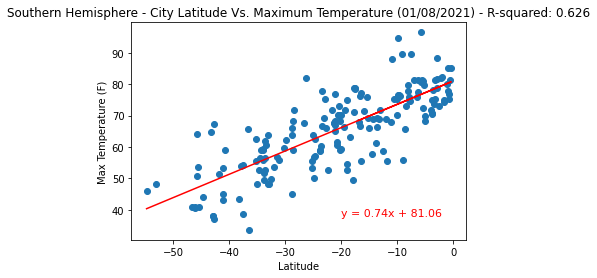

In [192]:
temp = south["Max Temp"]
latitude = south["Lat"]

x_values = latitude
y_values = temp

slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(latitude,temp)
plt.annotate(line_eq,(-20,38),fontsize=11,color="red")
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"Southern Hemisphere - City Latitude Vs. Maximum Temperature (01/08/2021) - R-squared: {round(rvalue**2, 3)}")
plt.savefig("Southern_Hemisphere_Latitude_Vs_Temperature.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

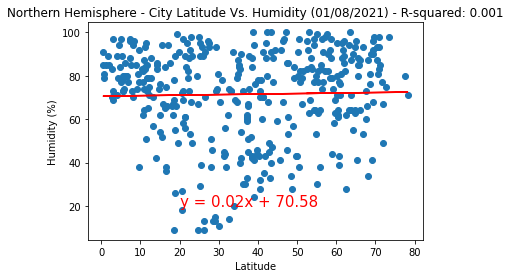

In [194]:
humidity = north["Humidity"]
latitude = north["Lat"]

x_values = latitude
y_values = humidity

slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(latitude,humidity)
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Northern Hemisphere - City Latitude Vs. Humidity (01/08/2021) - R-squared: {round(rvalue**2, 3)}")
plt.savefig("Northern_Hemisphere_Latitude_Vs_Humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

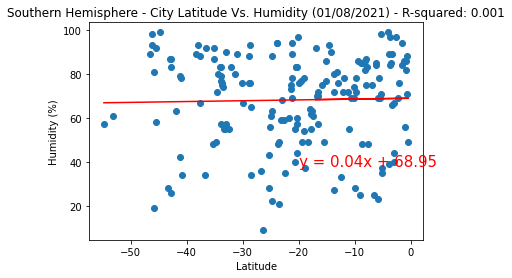

In [196]:
humidity = south["Humidity"]
latitude = south["Lat"]

x_values = latitude
y_values = humidity

slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(latitude,humidity)
plt.annotate(line_eq,(-20,38),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Southern Hemisphere - City Latitude Vs. Humidity (01/08/2021) - R-squared: {round(rvalue**2, 3)}")
plt.savefig("Southern_Hemisphere_Latitude_Vs_Humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

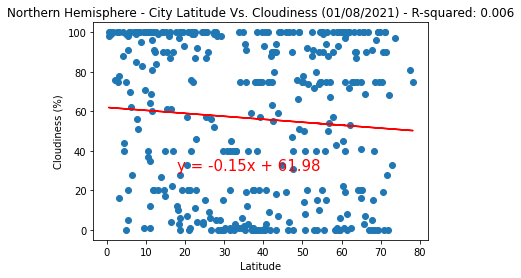

In [199]:
cloudiness = north["Cloudiness"]
latitude = north["Lat"]

x_values = latitude
y_values = cloudiness

slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(latitude,cloudiness)
plt.annotate(line_eq,(18,30),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Northern Hemisphere - City Latitude Vs. Cloudiness (01/08/2021) - R-squared: {round(rvalue**2, 3)}")
plt.savefig("Northern_Hemisphere_Latitude_Vs_Cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

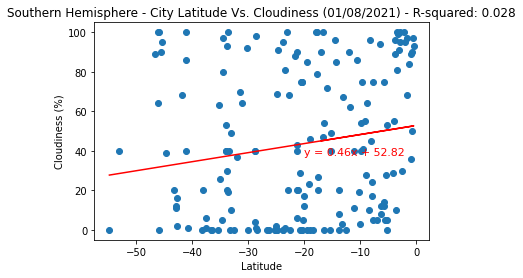

In [200]:
cloudiness = south["Cloudiness"]
latitude = south["Lat"]

x_values = latitude
y_values = cloudiness

slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(latitude,cloudiness)
plt.annotate(line_eq,(-20,38),fontsize=11,color="red")
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Southern Hemisphere - City Latitude Vs. Cloudiness (01/08/2021) - R-squared: {round(rvalue**2, 3)}")
plt.savefig("Southern_Hemisphere_Latitude_Vs_Cloudiness.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

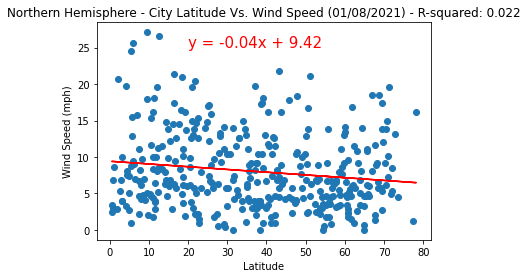

In [202]:
wind = north["Wind Speed"]
latitude = north["Lat"]

x_values = latitude
y_values = wind

slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(latitude, wind)
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Northern Hemisphere - City Latitude Vs. Wind Speed (01/08/2021) - R-squared: {round(rvalue**2, 3)}")
plt.savefig("Northern_Hemisphere_Latitude_Vs_Wind Speed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

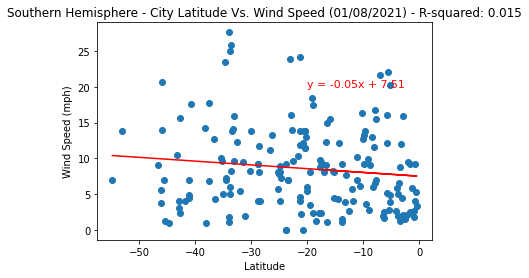

In [204]:
wind = south["Wind Speed"]
latitude = south["Lat"]

x_values = latitude
y_values = wind

slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(latitude, wind)
plt.annotate(line_eq,(-20,20),fontsize=11,color="red")
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Southern Hemisphere - City Latitude Vs. Wind Speed (01/08/2021) - R-squared: {round(rvalue**2, 3)}")
plt.savefig("Southern_Hemisphere_Latitude_Vs_Wind Speed.png")
plt.show()

####  Observable Trends:

#### 1) The closer to the equater for Latitude, the higher the Maximum Temperature
#### 2) The closer to the equater for Latitude, the higher the Cloudiness %
#### 3) Northern Hemisphere has far more cases of 100% coudiness compared to the Southern Hemisphere